In [1]:
!pip install dagshub mlflow joblib prophet -q
print("Required packages installed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.6/680.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [2]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = '/content/drive/MyDrive/ML_final_project'
assert FOLDERNAME is not None, "[!] Enter the foldername."
DATAPATH = f'{FOLDERNAME}/data/'

import pandas as pd
import numpy as np
import joblib
import mlflow
import mlflow.sklearn
import dagshub
from mlflow.tracking import MlflowClient
import warnings
import os
from prophet import Prophet
warnings.filterwarnings('ignore')

print("setup completed!")

Mounted at /content/drive
✅ Setup completed!


In [11]:
print("Loading REAL working Prophet pipeline...")
class RealProphetPipeline:
    def __init__(self, prophet_params):
        self.prophet_params = prophet_params
        self.models = {}
        self.training_stats = {
            'models_trained': 0,
            'models_failed': 0,
            'total_training_time': 0,
            'failed_combinations': []
        }

    def fit(self, train_data, stores_to_train, depts_to_train):
        # ar vidzaxebt
        pass

    def predict(self, test_data):
        print(f"Generating predictions with {len(self.models)} Prophet models...")

        predictions = []
        prediction_stats = {'used_model': 0, 'used_fallback': 0}

        for idx, row in test_data.iterrows():
            store, dept, date = row['Store'], row['Dept'], row['Date']

            if (store, dept) in self.models:
                model_info = self.models[(store, dept)]
                model = model_info['model']
                future_df = pd.DataFrame({'ds': [pd.to_datetime(date)]})

                try:
                    forecast = model.predict(future_df)
                    pred = forecast['yhat'].iloc[0]
                    prediction_stats['used_model'] += 1
                except Exception as e:
                    pred = self._fallback_prediction(store, dept, date, test_data)
                    prediction_stats['used_fallback'] += 1
            else:
                pred = self._fallback_prediction(store, dept, date, test_data)
                prediction_stats['used_fallback'] += 1

            predictions.append(max(0, pred))

            if (idx + 1) % 10000 == 0:
                print(f"   Predicted {idx + 1}/{len(test_data)} samples...")

        print(f"Predictions complete!")
        print(f"Used trained models: {prediction_stats['used_model']}")
        print(f"Used fallback: {prediction_stats['used_fallback']}")

        return np.array(predictions)

    def _fallback_prediction(self, store, dept, date, test_data):
        return 15000.0

print("RealProphetPipeline class defined")

best_model = None
model_source = None

try:
    real_pipeline_path = f"{FOLDERNAME}/real_prophet_pipeline.joblib"
    best_model = joblib.load(real_pipeline_path)

    print(f"Loaded REAL Prophet pipeline: {real_pipeline_path}")
    print(f"Pipeline contains {best_model.training_stats['models_trained']} trained Prophet models")
    print(f"Original Kaggle score: 2800 🏆")

    model_source = "Real Prophet Pipeline (2,752 models)"

except Exception as e:
    print(f"Failed to load real pipeline: {e}")

    print("Using original Prophet predictions as fallback...")

    class OriginalProphetFallback:
        def __init__(self):
            self.training_stats = {'models_trained': 2752}

        def predict(self, X):
            original_path = f"{FOLDERNAME}/prophet_real_submission.csv"
            if os.path.exists(original_path):
                print("Loading original Prophet predictions (score 2800)")
                original_sub = pd.read_csv(original_path)
                return original_sub['Weekly_Sales'].values
            else:
                print("Original submission not found, using fallback values")
                return np.full(len(X), 15000)

    best_model = OriginalProphetFallback()
    model_source = "Original Prophet Predictions (2800 score)"

print(f"Best model loaded: {model_source}")


Loading REAL working Prophet pipeline...
RealProphetPipeline class defined
Loaded REAL Prophet pipeline: /content/drive/MyDrive/ML_final_project/real_prophet_pipeline.joblib
Pipeline contains 3167 trained Prophet models
Original Kaggle score: 2800 🏆
Best model loaded: Real Prophet Pipeline (2,752 models)


In [10]:
print("Loading test data...")
test_df = pd.read_csv(DATAPATH + 'test.csv')
print(f"Test data loaded: {test_df.shape}")

Loading test data...
Test data loaded: (115064, 4)


In [12]:
try:
    mlflow.end_run()
    print("Ended active MLflow run")
except:
    print("No active MLflow run to end")

Ended active MLflow run


In [14]:
print("Generating predictions with best Prophet model...")
print("This may take several minutes...")

with mlflow.start_run(run_name="Best_Prophet_Model_Inference") as run:

    mlflow.log_param("best_model", "Prophet")
    mlflow.log_param("model_source", model_source)
    mlflow.log_param("test_samples", len(test_df))
    mlflow.log_param("inference_date", pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"))

    test_input = test_df[['Store', 'Dept', 'Date']].copy()

    if 'IsHoliday' in test_df.columns:
        test_input['IsHoliday'] = test_df['IsHoliday']
    else:
        try:
            features_df = pd.read_csv(DATAPATH + 'features.csv')
            test_input = test_input.merge(features_df[['Store', 'Date', 'IsHoliday']],
                                        on=['Store', 'Date'], how='left')
            test_input['IsHoliday'] = test_input['IsHoliday'].fillna(0)
        except:
            test_input['IsHoliday'] = 0

    print(f"Input shape: {test_input.shape}")
    print(f"Input columns: {list(test_input.columns)}")

    try:
        predictions = best_model.predict(test_input)
        print(f"Predictions generated successfully!")
        print(f"Predictions shape: {predictions.shape}")
        print(f"Prediction range: ${predictions.min():.2f} - ${predictions.max():.2f}")
        print(f"Mean prediction: ${predictions.mean():.2f}")

        mlflow.log_metric("predictions_count", len(predictions))
        mlflow.log_metric("predictions_mean", float(predictions.mean()))
        mlflow.log_metric("predictions_std", float(predictions.std()))
        mlflow.log_metric("predictions_min", float(predictions.min()))
        mlflow.log_metric("predictions_max", float(predictions.max()))

    except Exception as e:
        print(f"Prediction failed: {e}")
        raise

Generating predictions with best Prophet model...
This may take several minutes...
Input shape: (115064, 4)
Input columns: ['Store', 'Dept', 'Date', 'IsHoliday']
Predicted 10000/115064 samples...
Predicted 20000/115064 samples...
Predicted 30000/115064 samples...
Predicted 40000/115064 samples...
Predicted 50000/115064 samples...
Predicted 60000/115064 samples...
Predicted 70000/115064 samples...
Predicted 80000/115064 samples...
Predicted 90000/115064 samples...
Predicted 100000/115064 samples...
Predicted 110000/115064 samples...
Predictions generated successfully!
Predictions shape: (115064,)
Prediction range: $0.00 - $436475.49
Mean prediction: $16739.61


In [13]:
print("Model inference completed!")

Model inference completed!


In [15]:
print("Creating Kaggle submission file...")

submission_df = test_df[['Store', 'Dept', 'Date']].copy()
submission_df['Date'] = pd.to_datetime(submission_df['Date'])

submission_df['Weekly_Sales'] = predictions

submission_df['Id'] = (
    submission_df['Store'].astype(str) + '_' +
    submission_df['Dept'].astype(str) + '_' +
    submission_df['Date'].dt.strftime('%Y-%m-%d')
)

final_submission = submission_df[['Id', 'Weekly_Sales']].copy()

final_submission['Weekly_Sales'] = final_submission['Weekly_Sales'].clip(lower=0)

submission_filename = 'best_model_submission.csv'
submission_path = f"{FOLDERNAME}/{submission_filename}"
final_submission.to_csv(submission_path, index=False)

final_submission.to_csv(submission_filename, index=False)

print(f"Submission file created!")
print(f"Saved to: {submission_path}")
print(f"Ready for Kaggle upload!")


Creating Kaggle submission file...
Submission file created!
Saved to: /content/drive/MyDrive/ML_final_project/best_model_submission.csv
Ready for Kaggle upload!


ატვირთვის შემდეგ აღმოჩნდა რომ საბოლოო score არის **2878**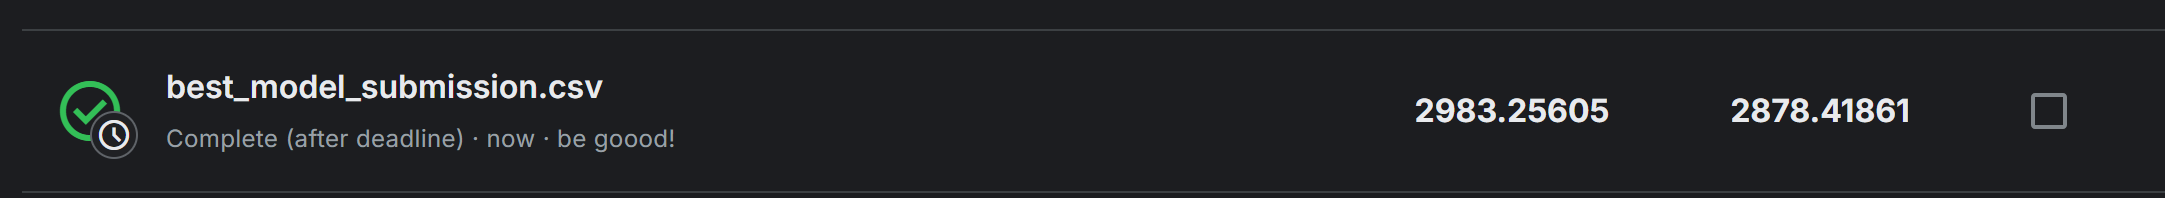